In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [194]:
# import raw data
data = pd.read_excel('C:\\Users\\user\\Downloads\\Dresses_Attribute_Sales\\Dresses_Attribute_Sales\\Attribute DataSet.xlsx')
data=data.fillna(data.mean())    # Replacing NaNs
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


In [195]:
data.drop("Dress_ID", axis=1,inplace=True)
data

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


In [196]:
data=pd.get_dummies(data=data, columns=['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType','Decoration', 'Pattern Type'])
data

,Rating,Recommendation,Style_Brief,Style_Casual,Style_Flare,Style_Novelty,Style_OL,Style_Sexy,Style_bohemian,Style_cute,...,Pattern Type_geometric,Pattern Type_leapord,Pattern Type_leopard,Pattern Type_none,Pattern Type_patchwork,Pattern Type_plaid,Pattern Type_print,Pattern Type_solid,Pattern Type_splice,Pattern Type_striped
0,4.6,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.6,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.7,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
496,4.3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4.7,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
498,4.6,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [197]:
x= data.drop("Recommendation",axis=1)
y=data["Recommendation"]

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [199]:
dtc=DecisionTreeClassifier(criterion='gini', random_state = 33, max_depth=18)

In [200]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18, random_state=33)

In [201]:
train_prediction = dtc.predict(x_train)
test_prediction = dtc.predict(x_test)

In [202]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_prediction)
print(r2)

-0.8518518518518519


In [203]:
print('Accuracy is:', accuracy_score(y_train, train_prediction))

Accuracy is: 0.995


In [204]:
print(classification_report(y_train, train_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       0.99      0.99      0.99       164

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



confusion_matrix
[[235   1]
 [  1 163]]


<AxesSubplot:>

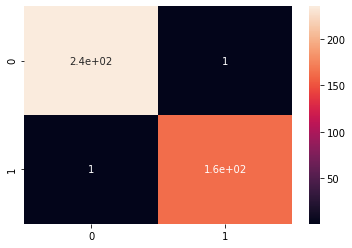

In [205]:
a=confusion_matrix(y_train, train_prediction)
print('confusion_matrix')
print(a)
sns.heatmap(a,annot=True)

[Text(1890.410923853712, 1764.3157894736842, 'X[30] <= 0.5\ngini = 0.484\nsamples = 400\nvalue = [236, 164]'),
 Text(1568.7721752183406, 1668.9473684210527, 'X[10] <= 0.5\ngini = 0.455\nsamples = 303\nvalue = [197, 106]'),
 Text(1299.8805949781658, 1573.578947368421, 'X[89] <= 0.5\ngini = 0.441\nsamples = 280\nvalue = [188, 92]'),
 Text(1279.5749181222707, 1478.2105263157896, 'X[1] <= 0.5\ngini = 0.436\nsamples = 277\nvalue = [188, 89]'),
 Text(1259.2692412663755, 1382.842105263158, 'X[0] <= 4.85\ngini = 0.445\nsamples = 266\nvalue = [177, 89]'),
 Text(1015.9183951965066, 1287.4736842105262, 'X[35] <= 0.5\ngini = 0.426\nsamples = 228\nvalue = [158, 70]'),
 Text(772.884825327511, 1192.1052631578948, 'X[11] <= 0.5\ngini = 0.403\nsamples = 200\nvalue = [144, 56]'),
 Text(752.5791484716157, 1096.7368421052633, 'X[51] <= 0.5\ngini = 0.397\nsamples = 198\nvalue = [144, 54]'),
 Text(479.721615720524, 1001.3684210526316, 'X[25] <= 0.5\ngini = 0.37\nsamples = 155\nvalue = [117, 38]'),
 Text(294

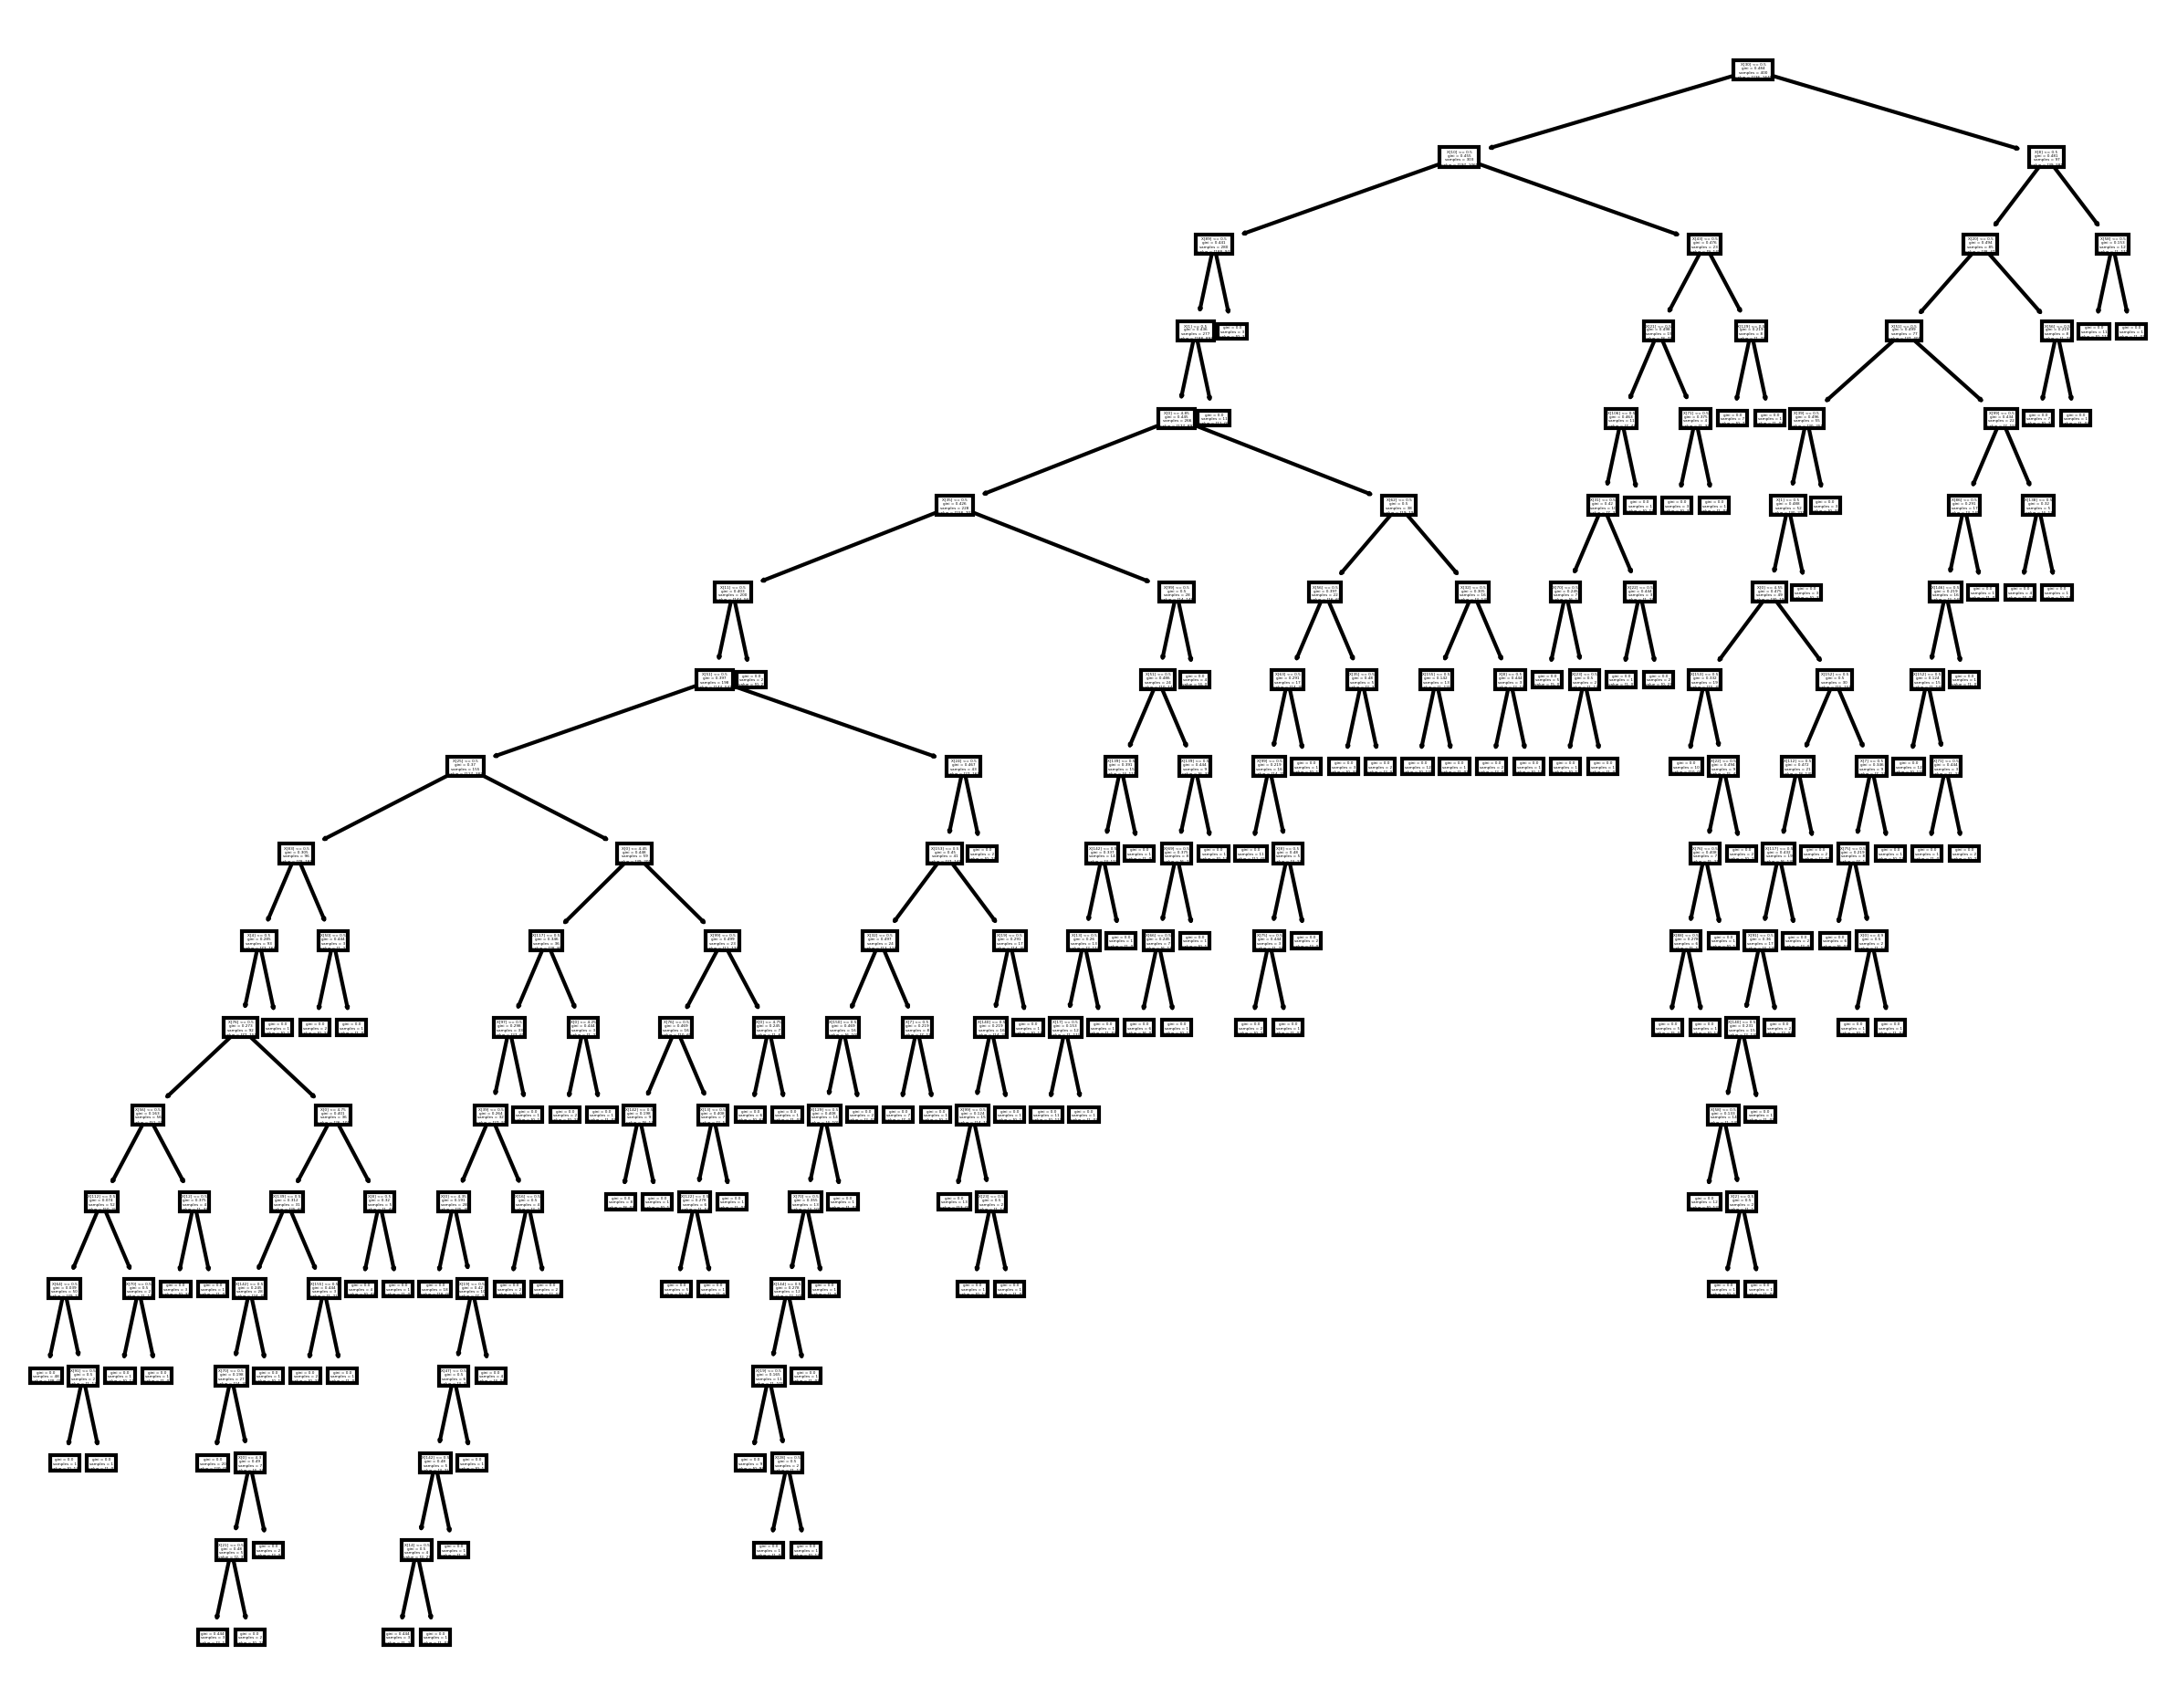

In [206]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=300)
plot_tree(dtc)

In [207]:
feature_imp = pd.Series(dtc.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_imp)

Rating                 0.085374
FabricType_chiffon     0.050134
Season_Spring          0.047397
SleeveLength_full      0.036138
Style_cute             0.035537
                         ...   
Material_milksilk      0.000000
Material_microfiber    0.000000
Material_lycra         0.000000
Material_linen         0.000000
Material_lace          0.000000
Length: 156, dtype: float64


No handles with labels found to put in legend.


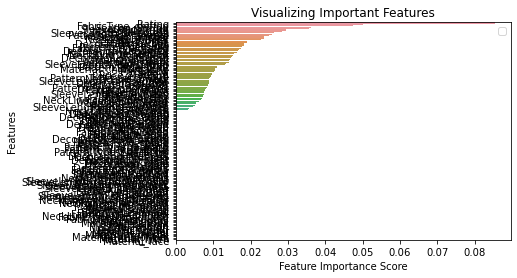

In [208]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()